**Support Vector Regression (SVR)**

**What is SVR?**

**Support Vector Regression (SVR)** is a type of Support Vector Machine (SVM) used for regression tasks instead of classification.



Unlike regular regression models (like Linear Regression), SVR tries to **fit the best line (or curve in nonlinear cases) within a threshold margin**, such that most data points fall **within a defined distance (epsilon)** from the line.



**Explanation**

**🔷 Elements in the Image:**

1. **Blue Line** – This is the regression line (hyperplane) that SVR is trying to find. It’s the predicted function.

2. **Dotted Margins (Above & Below Blue Line)** – These lines represent the **epsilon margin (ε)**. SVR allows predictions to be within this range of error from the actual values. This is called the **epsilon-tube.**

3. **Black Points on Line or within Margins **– These are data points that lie **within the epsilon margin**. These are considered **"correctly predicted"** or acceptable points, as they lie close enough to the predicted function.

4. **Red Points Outside the Margins** – These are the **support vectors**, i.e., points that lie **outside the epsilon margin**. SVR tries to **minimize the error of these points** while keeping the model as flat as possible.

5. **Dashed Arrows from Red Points to Margin** – These indicate how **far the red points are from the epsilon boundary** (i.e., the loss for those predictions).








**How Are New Values Predicted?**

To predict new values, SVR uses a kernel function (like linear, polynomial, RBF, etc.) to find the best fit line or curve that **minimizes the error beyond epsilon** and also **keeps the model as simple (flat) as possible.**

Steps:

1. **Train the SVR model** using the training data.

2. It tries to keep most training points within the **epsilon margin.**
3. **Support vectors** are used to define the optimal line — they’re the only points that influence the model.
4. Once trained, the model can **predict new outputs** by applying the function learned.

✅ If the predicted value is within ε of the actual value, there's **no penalty** (i.e., considered an okay prediction). ❌ If the predicted value is outside ε, the model **incurs a loss** and tries to adjust weights accordingly during training.








*  SVR finds a **flat function (line or curve)**that fits the data within an epsilon margin.


*   It focuses on **support vectors –**points that lie **outside** the margin.

*   New predictions are made using this function.



*   SVR is useful when you want to **ignore small errors** and focus only on large deviations.




**Load and Explore the Dataset**



In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

In [ ]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


**Feature Scaling (Very Important for SVR)**

SVR uses distance-based calculations, so scaling ensures all features contribute equally.



In [ ]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']].values
sc_X = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_X.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

**Flatten y for SVR**


In [ ]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [ ]:
y_scaled = y_scaled.ravel()

In [ ]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

**Train SVR Model (RBF Kernel)**


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

SVR(C=100)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**


**Predictions and Inverse Scaling**


In [ ]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

**Visualization: Actual vs Predicted**


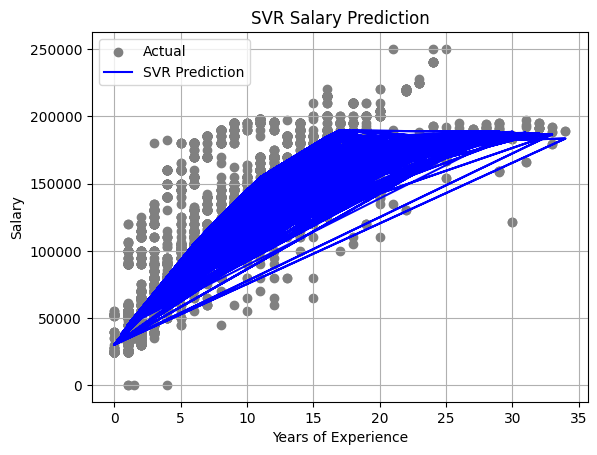

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='grey',label='Actual')
plt.plot(x,y_pred,color='blue',label='SVR Prediction')
plt.title("SVR Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

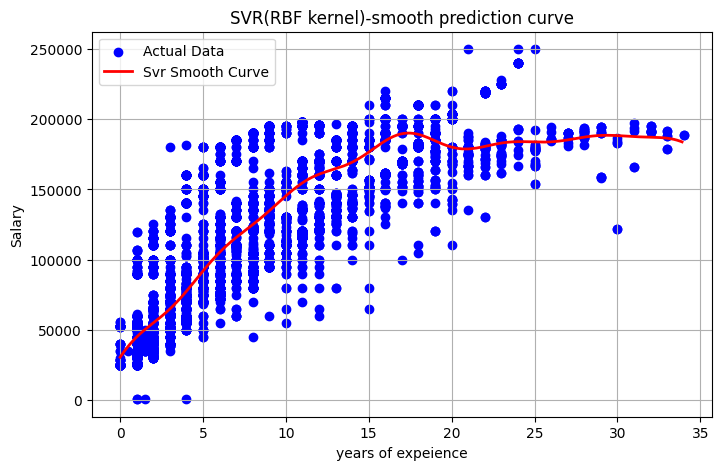

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_grid = np.arange(min(x.ravel()),max(x.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)

#Scale X_grid just like training data
X_grid_scaled = sc_X.transform(X_grid)

# predict on the grid and inverse transform the result
y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#plot
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(X_grid,y_grid,color='red',label='Svr Smooth Curve',linewidth=2)
plt.title("SVR(RBF kernel)-smooth prediction curve")
plt.xlabel("years of expeience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()



Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R² Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R² Score: 0.7275580175081495


**Understanding and Comparing Kernels**

**What is a Kernel?**

A kernel helps SVR handle non-linearity by transforming the data into higher dimensions.



**Kernel Types:**

**1. Linear Kernel**
* No transformation applied.
* Suitable for linear data.

**2. Polynomial Kernel**

* Applies curved transformations.
* Degree can be controlled (degree=2, 3, etc.).

**3. RBF (Radial Basis Function) Kernel**

* Most flexible.
* Useful when data pattern is complex or unknown.

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

**Compare Kernels Using Code**


Kernel: LINEAR | R² Score: 0.6326


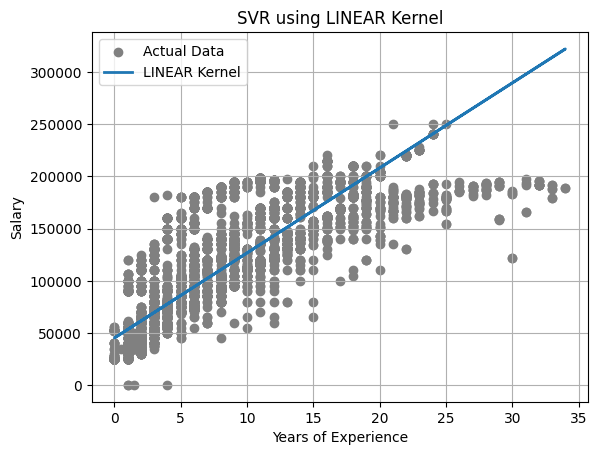

Kernel: POLY | R² Score: 0.0578


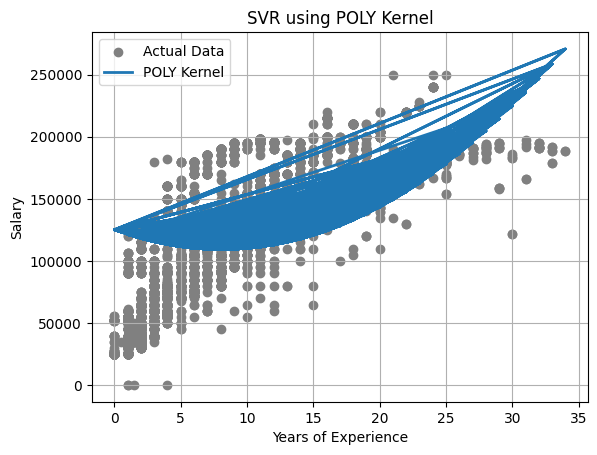

Kernel: RBF | R² Score: 0.7249


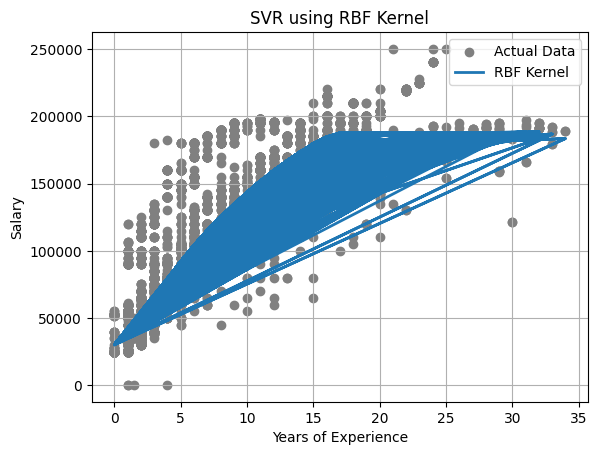

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel()  # flatten y

# 2. define kernels
kernels = ['linear', 'poly', 'rbf']

# 3. train and evaluate each kernel
for kernel in kernels:
    if kernel == 'poly':
        model = SVR(kernel=kernel, degree=2)
    else:
        model = SVR(kernel=kernel)

    model.fit(X_scaled, y_scaled)

    # predict for training data
    y_pred_scaled = model.predict(X_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # evaluation
    score = r2_score(y, y_pred)
    print(f"Kernel: {kernel.upper()} | R² Score: {score:.4f}")

    # Plot
    plt.scatter(X, y, color='gray', label='Actual Data')
    plt.plot(X, y_pred, label=f'{kernel.upper()} Kernel', linewidth=2)
    plt.title(f'SVR using {kernel.upper()} Kernel')
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.legend()
    plt.show()

Deep Dive: Understanding C and epsilon in SVR


C — Penalty Parameter


In [ ]:
SVR(C=1)
SVR(C=100)

SVR(C=100)

epsilon — Epsilon-insensitive Margin


In [ ]:
SVR(epsilon=0.1)
SVR(epsilon=1.0)


SVR(epsilon=1.0)

Try Different C and epsilon Values


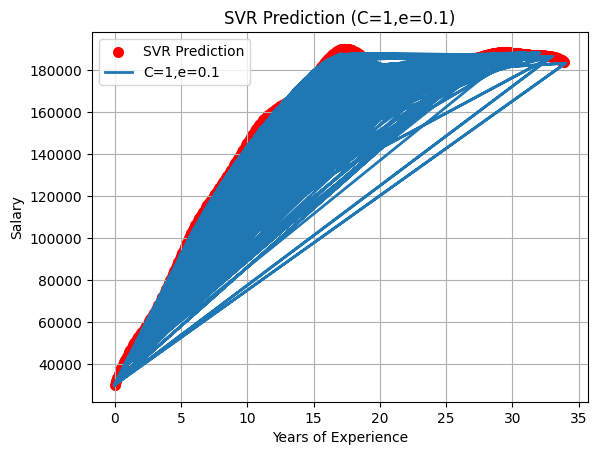

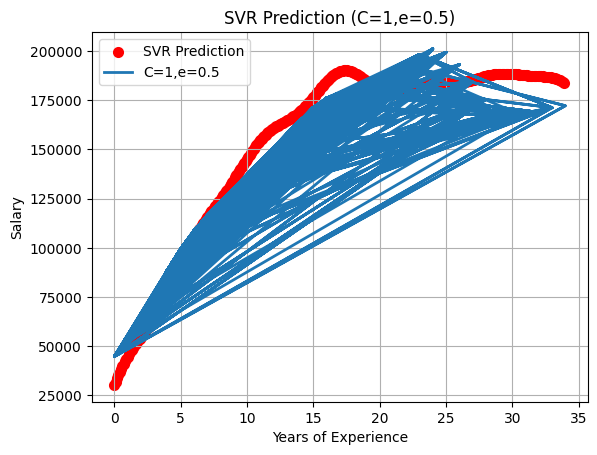

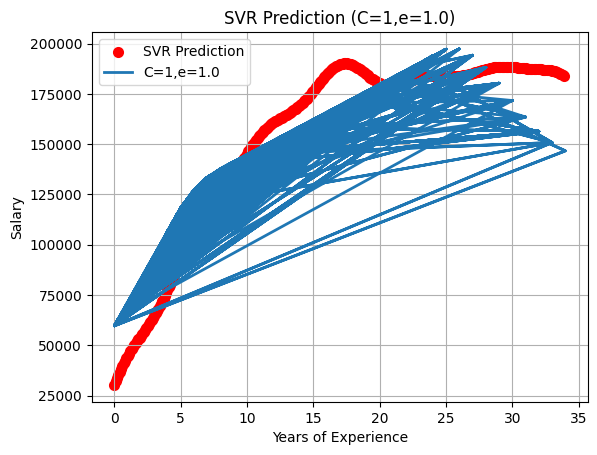

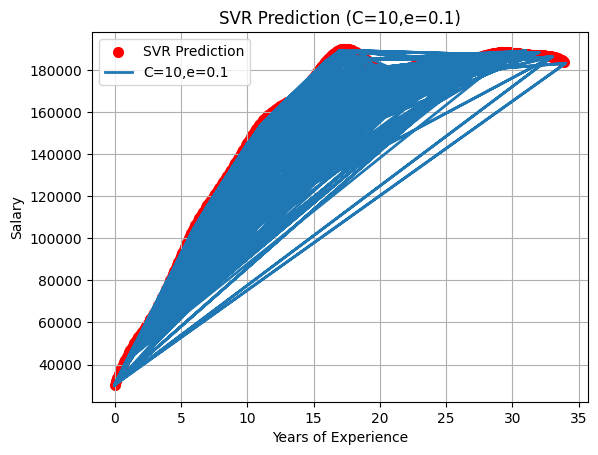

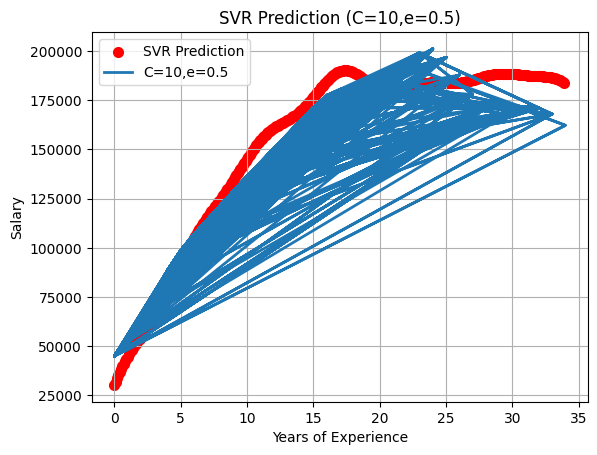

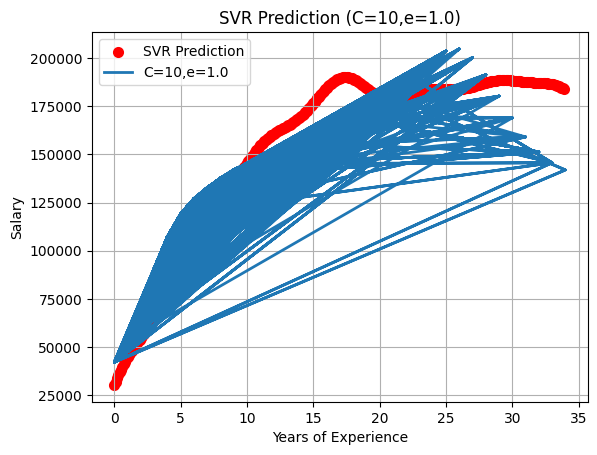

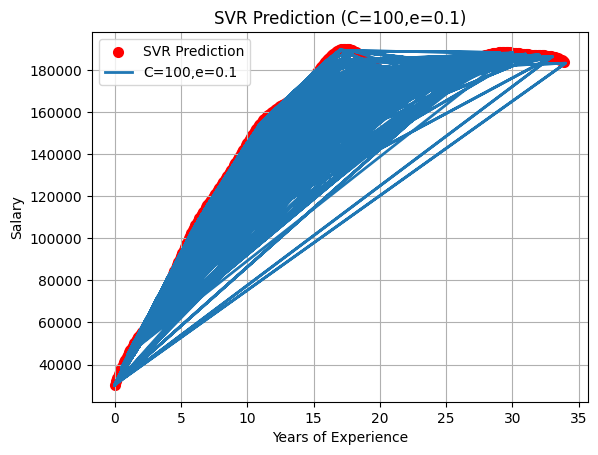

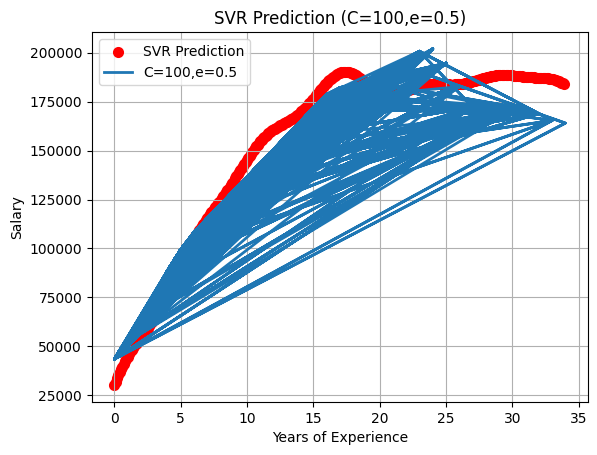

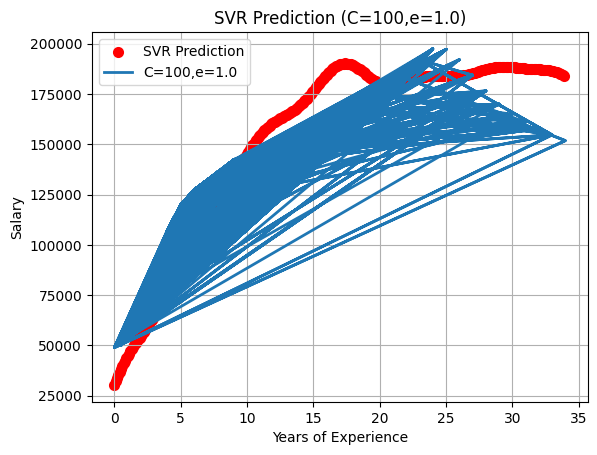

In [ ]:
C_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]


X_grid = np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)
X_grid_scaled = sc_X.transform(X_grid)

for c in C_values:
  for eps in epsilon_values:
    model = SVR(kernel='rbf',C=c,epsilon=eps)
    model.fit(X_scaled,y_scaled)
    y_pred = sc_y.inverse_transform(model.predict(X_scaled).reshape(-1,1))

    plt.scatter(X_grid,y_grid,color='red',label='SVR Prediction',linewidth=2)
    plt.plot(X,y_pred,label=f'C={c},e={eps}',linewidth=2)
    plt.title(f'SVR Prediction (C={c},e={eps})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()
    plt.show()



Real-world prediction

In [ ]:
exp = [[6.5]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1,1))
print(f'predicted salary for 6.5 years:Rs{salary[0][0]:,.2f}')

predicted salary for 6.5 years:Rs110,694.67


**Practice Task**

**Train SVR using different:**

* C = 1, 10, 100
* epsilon = 0.1, 0.5, 1.0
* Kernels: linear, poly, rbf

Kernel: LINEAR | C :1| Epsilon: 0.1|R2 Score:0.6326


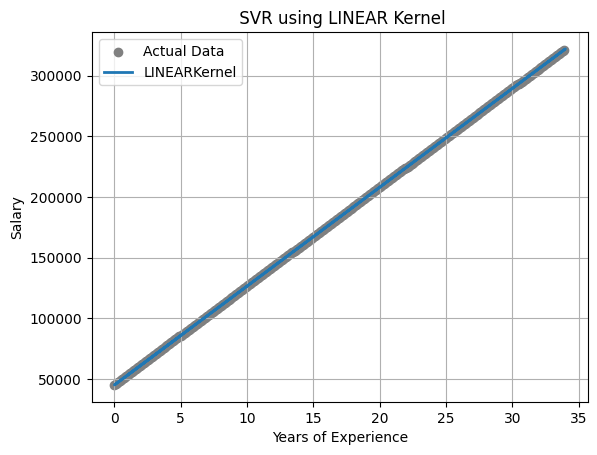

Kernel: LINEAR | C :1| Epsilon: 0.5|R2 Score:0.6526


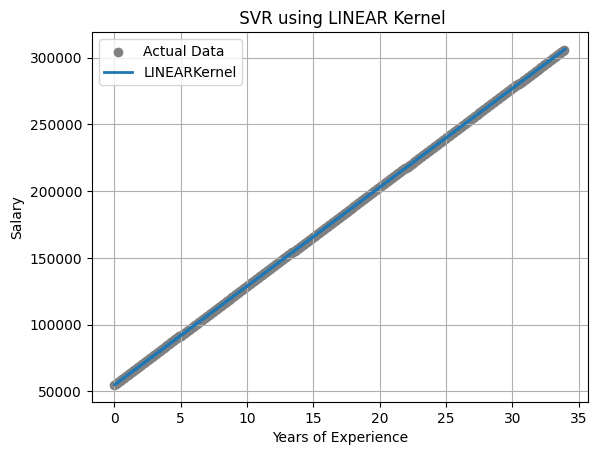

Kernel: LINEAR | C :1| Epsilon: 1.0|R2 Score:0.6000


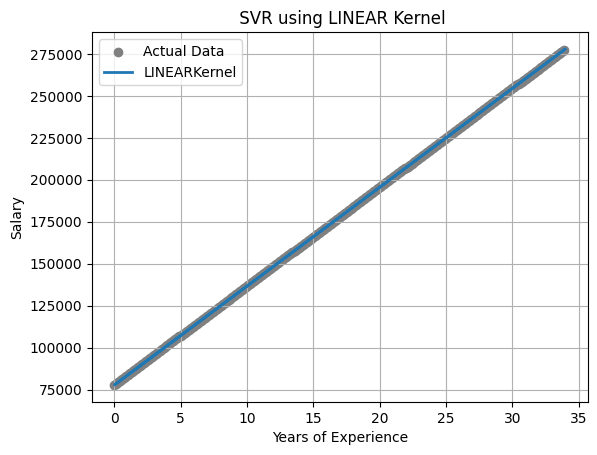

Kernel: LINEAR | C :10| Epsilon: 0.1|R2 Score:0.6326


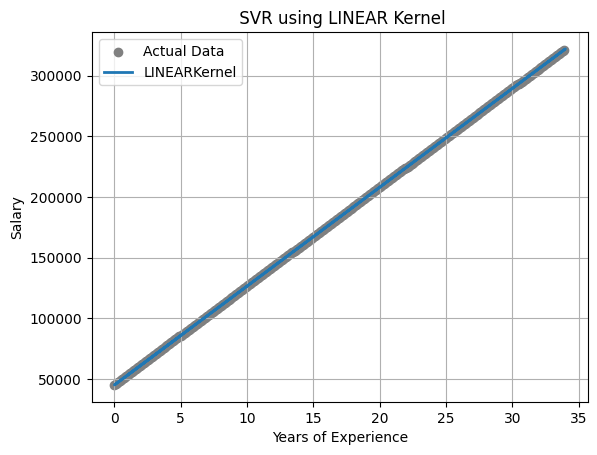

Kernel: LINEAR | C :10| Epsilon: 0.5|R2 Score:0.6526


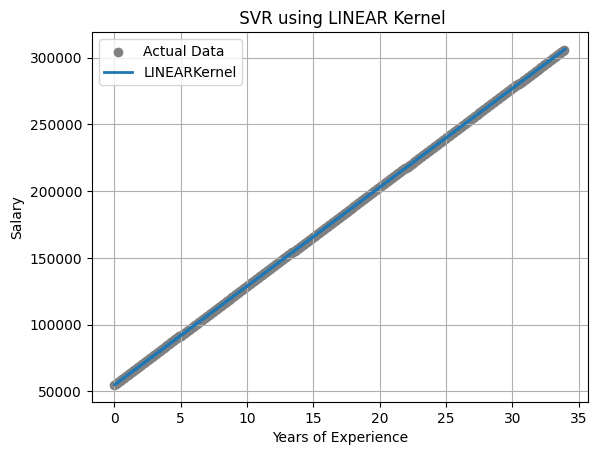

Kernel: LINEAR | C :10| Epsilon: 1.0|R2 Score:0.6000


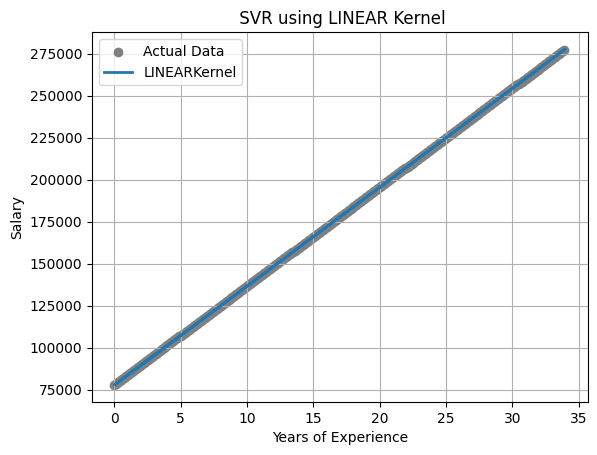

Kernel: LINEAR | C :100| Epsilon: 0.1|R2 Score:0.6326


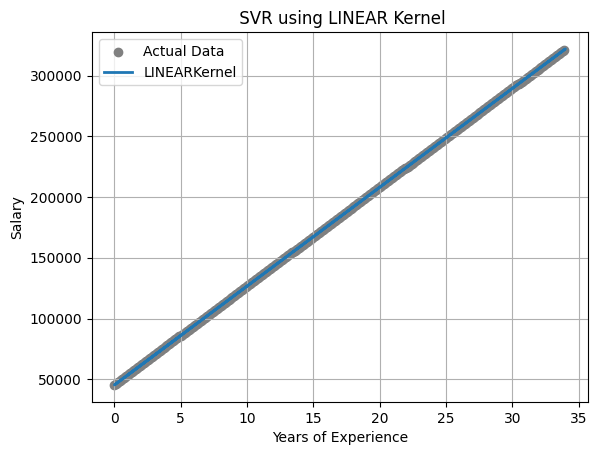

Kernel: LINEAR | C :100| Epsilon: 0.5|R2 Score:0.6526


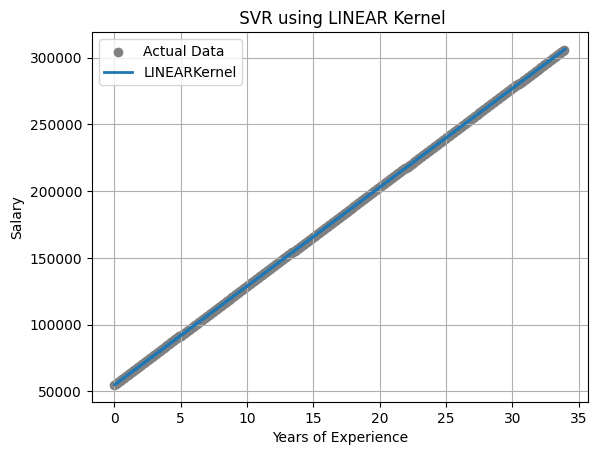

Kernel: LINEAR | C :100| Epsilon: 1.0|R2 Score:0.6001


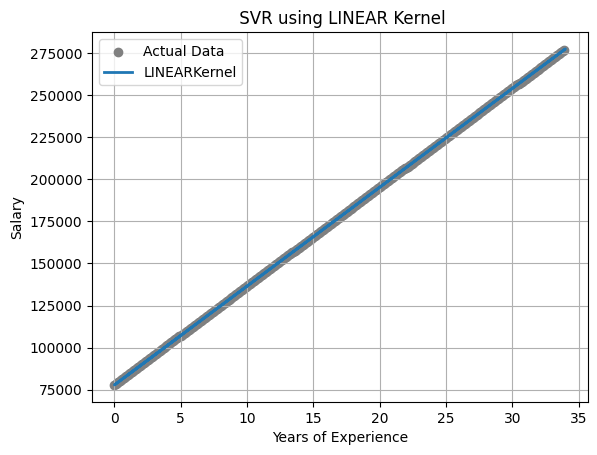

Kernel: POLY | C :1| Epsilon: 0.1|R2 Score:0.0578


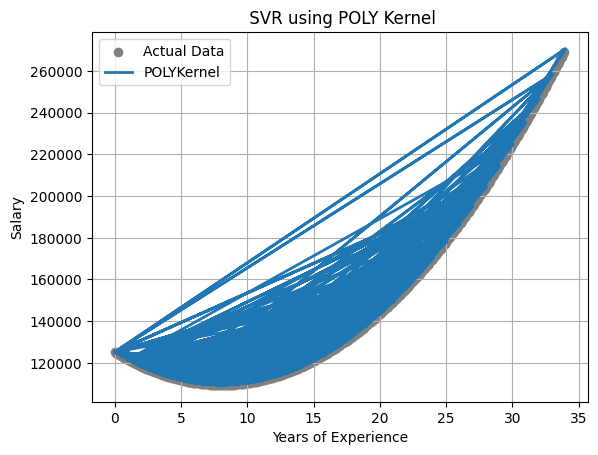

Kernel: POLY | C :1| Epsilon: 0.5|R2 Score:0.0611


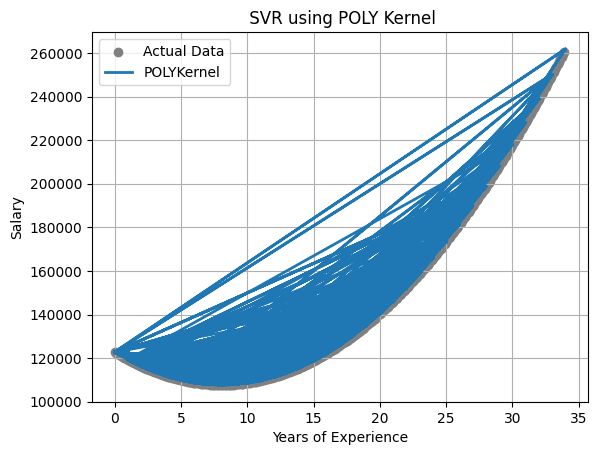

Kernel: POLY | C :1| Epsilon: 1.0|R2 Score:0.0604


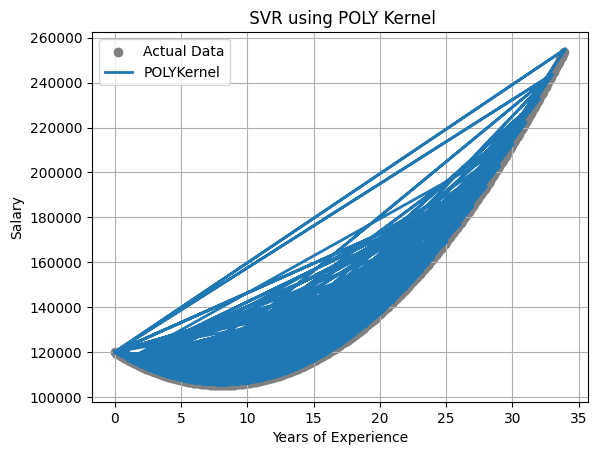

Kernel: POLY | C :10| Epsilon: 0.1|R2 Score:0.0578


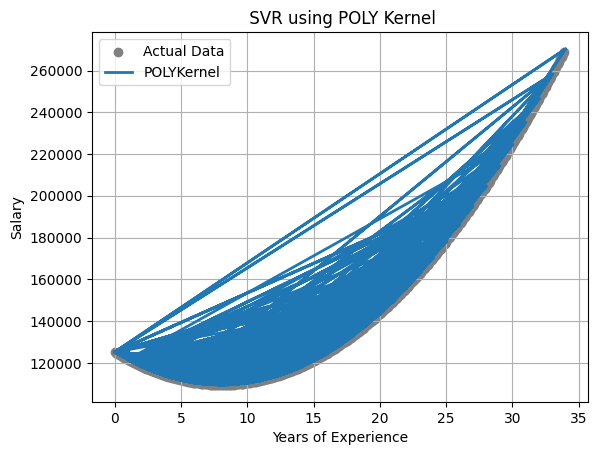

Kernel: POLY | C :10| Epsilon: 0.5|R2 Score:0.0611


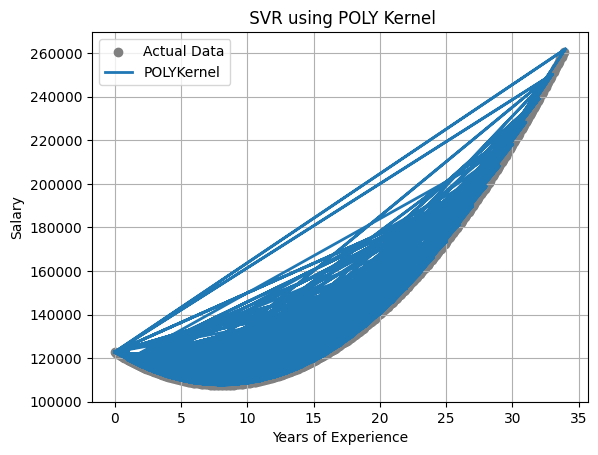

Kernel: POLY | C :10| Epsilon: 1.0|R2 Score:0.0604


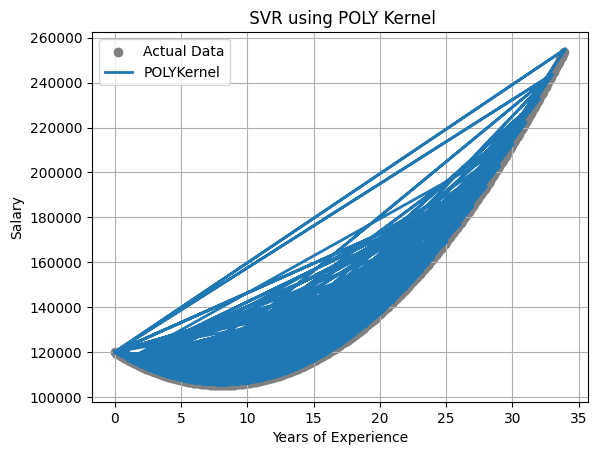

Kernel: POLY | C :100| Epsilon: 0.1|R2 Score:0.0580


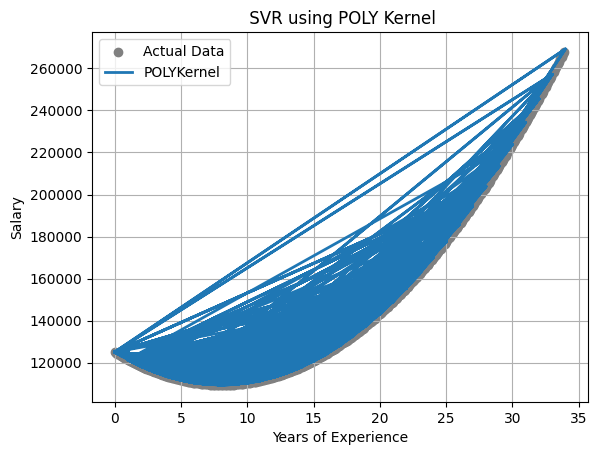

Kernel: POLY | C :100| Epsilon: 0.5|R2 Score:0.0611


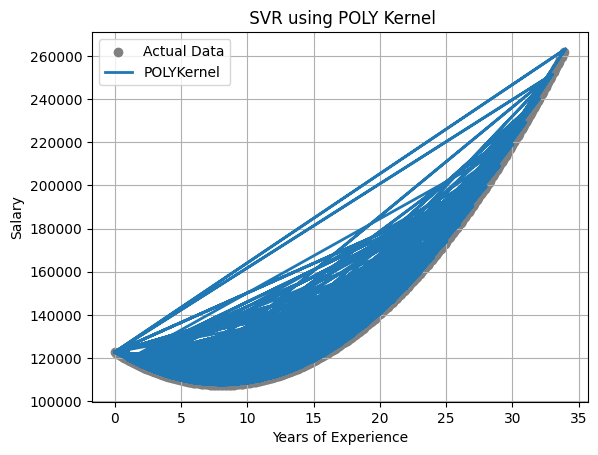

Kernel: POLY | C :100| Epsilon: 1.0|R2 Score:0.0605


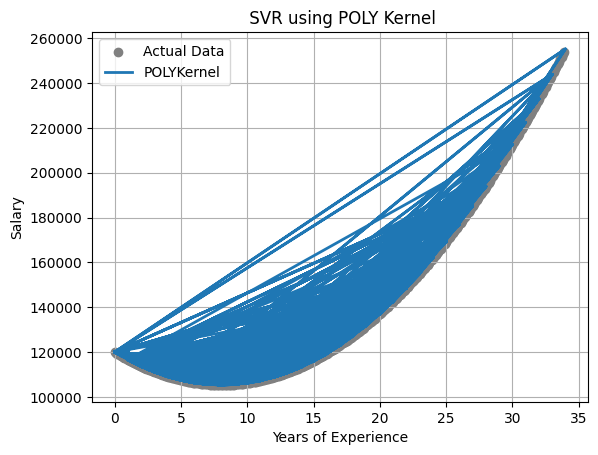

Kernel: RBF | C :1| Epsilon: 0.1|R2 Score:0.7249


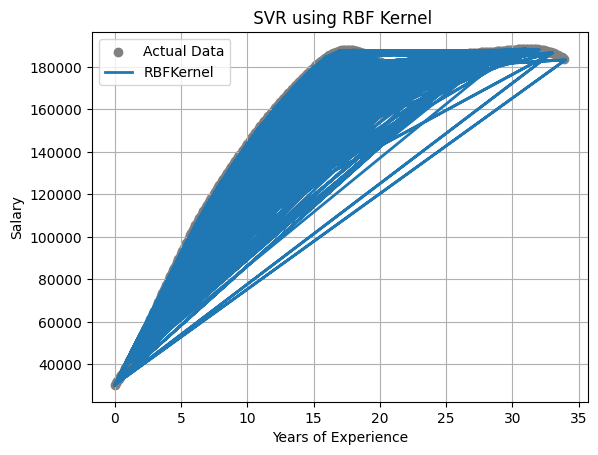

Kernel: RBF | C :1| Epsilon: 0.5|R2 Score:0.7307


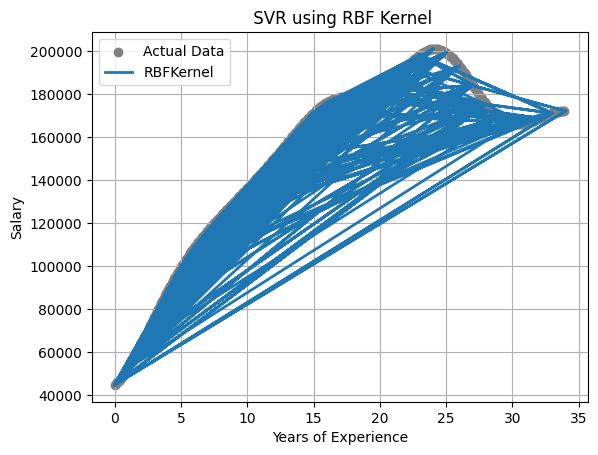

Kernel: RBF | C :1| Epsilon: 1.0|R2 Score:0.6502


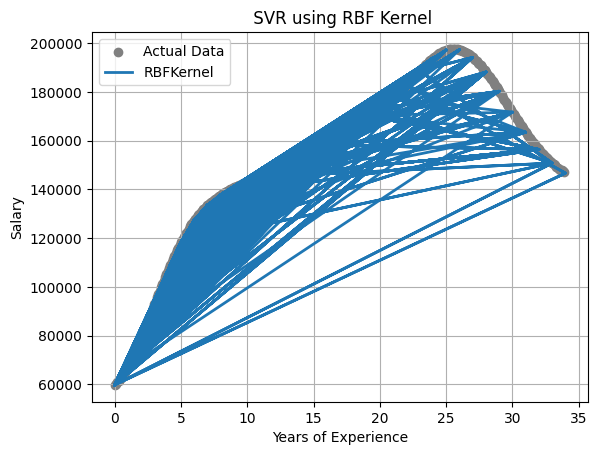

Kernel: RBF | C :10| Epsilon: 0.1|R2 Score:0.7271


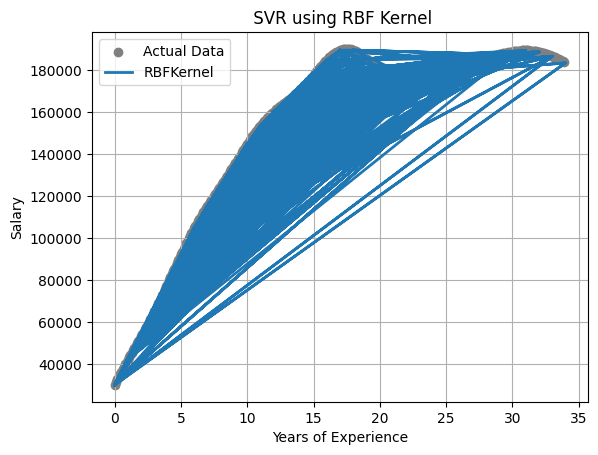

Kernel: RBF | C :10| Epsilon: 0.5|R2 Score:0.7294


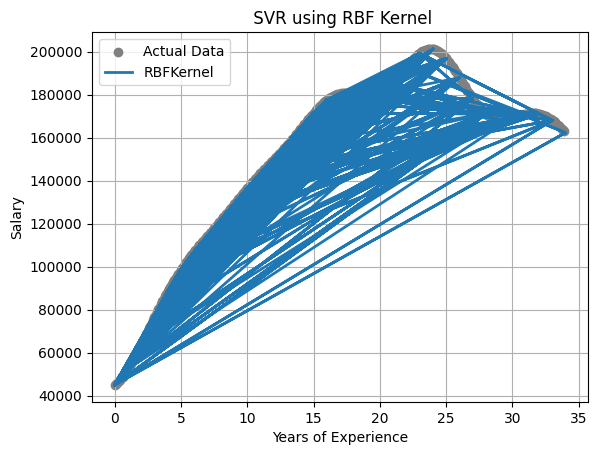

Kernel: RBF | C :10| Epsilon: 1.0|R2 Score:0.6686


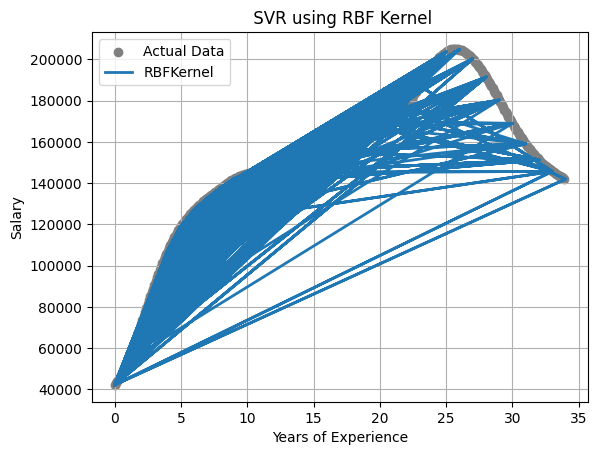

Kernel: RBF | C :100| Epsilon: 0.1|R2 Score:0.7276


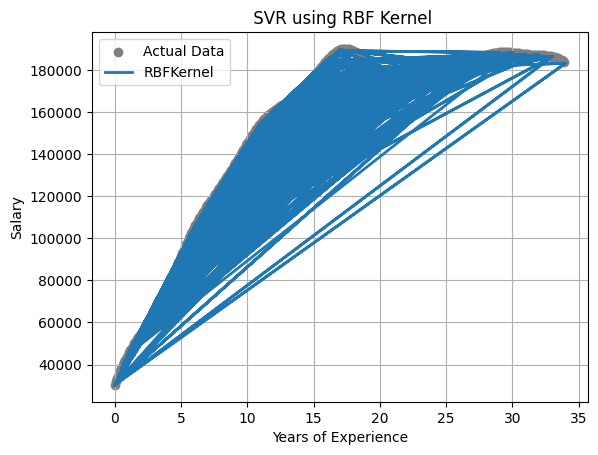

Kernel: RBF | C :100| Epsilon: 0.5|R2 Score:0.7305


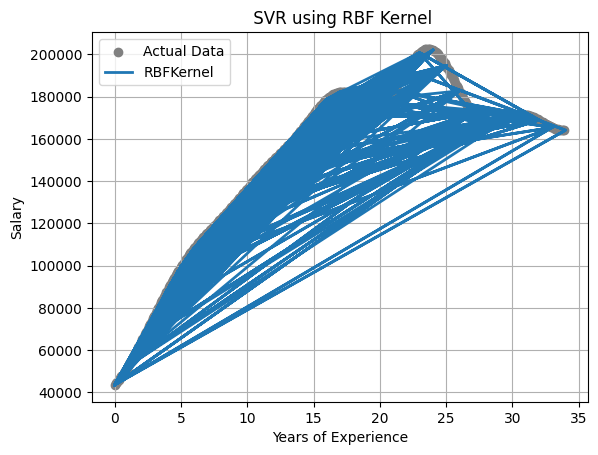

Kernel: RBF | C :100| Epsilon: 1.0|R2 Score:0.6692


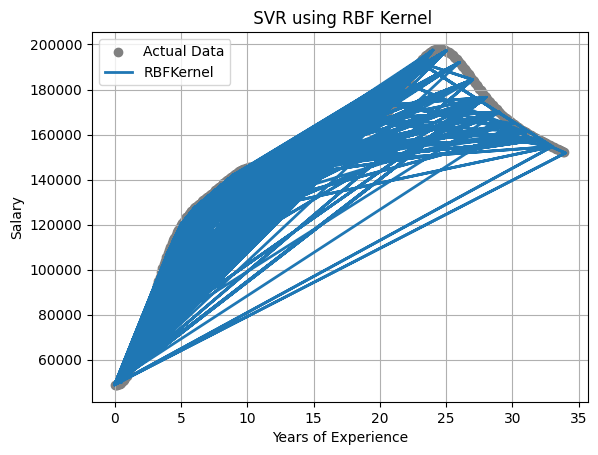

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#1. Load and scale data
X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel()


kernels = ['linear','poly','rbf']
C_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]

X_grid = np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)
X_grid_scaled = sc_X.transform(X_grid)

#3 train and evaluate each kernel
for kernel in kernels:
    for c in C_values:
        for eps in epsilon_values:
            if kernel == 'poly':
                model = SVR(kernel=kernel, degree=2, C=c, epsilon=eps)
            else:
                model = SVR(kernel=kernel, C=c, epsilon=eps)

            model.fit(X_scaled, y_scaled)

  #Predict for training data
            y_pred_scaled = model.predict(X_scaled)
            y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

            y_grid_scaled = model.predict(X_grid_scaled)
            y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

  #Evaluation
            score = r2_score(y,y_pred)
            print(f"Kernel: {kernel.upper()} | C :{c}| Epsilon: {eps}|R2 Score:{score:.4f}")

  #plot (optional)
            plt.scatter(X_grid,y_grid,color='gray',label='Actual Data')
            plt.plot(X,y_pred,label=f'{kernel.upper()}Kernel',linewidth=2)
            plt.title(f" SVR using {kernel.upper()} Kernel")
            plt.xlabel("Years of Experience")
            plt.ylabel("Salary")
            plt.grid(True)
            plt.legend()
            plt.show()

* Predict salary for 2, 5, and 9 years experience.



In [ ]:
exp = [[2]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1,1))

print(f'predicted salary for 2 years: Rs{salary[0][0]:,.2f}')

predicted salary for 2 years: Rs54,745.17


In [ ]:
exp = [[5]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1,1))

print(f'predicted salary for 5 years: Rs{salary[0][0]:,.2f}')

predicted salary for 5 years: Rs91,789.78


In [ ]:
exp = [[9]]
exp_scaled = sc_X.transform(exp)
salary_scaled = svr.predict(exp_scaled)
salary = sc_y.inverse_transform(salary_scaled.reshape(-1,1))

print(f'predicted salary for 9 years: Rs{salary[0][0]:,.2f}')

predicted salary for 9 years: Rs134,728.47
